In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

## Load data

In [4]:
# load data
data = pd.read_csv('kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [5]:
# size of data
data.shape

(145751, 75)

## Imbalanced target

In [6]:
# imbalanced target
data.target.value_counts() / len(data)

-1    0.991108
 1    0.008892
Name: target, dtype: float64

## Separate train and test

In [7]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Random Undersampling

[RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

In [11]:
rus=RandomUnderSampler(sampling_strategy='auto', # resample all classes but the minority class
                       random_state=0,           #reproducibility
                       replacement=True          #Whether the sample is with or without replacement.
)

X_resampled,y_resampled=rus.fit_resample(X_train,y_train)


In [12]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((1782, 74), (1782,))

In [13]:
# number of samples of each class in the original dataset
y_train.value_counts()

-1    101134
 1       891
Name: target, dtype: int64

In [14]:
# number of samples of each class in the dataset after resampling
y_resampled.value_counts()

-1    891
 1    891
Name: target, dtype: int64

In [15]:
a=y_train.value_counts()

In [23]:
# final data size is 2 times the number of observations
# with positive class:

y_train.value_counts()[1] * 2

1782

## Plot data

Let's compare how the data looks before and after the undersampling.

[Text(0.5, 1.0, '"Original dataset"')]

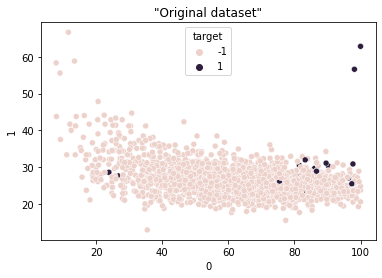

In [23]:
sns.scatterplot(data=data.sample(1784,random_state=0), #plot only 1784 samples from the original dataset
               x='0', #plot the two first features
               y='1',
               hue='target').set(title='"Original dataset"')


In [28]:
data_resampled=pd.concat([X_resampled,y_resampled],axis=1)

[Text(0.5, 1.0, 'Resampled dataset')]

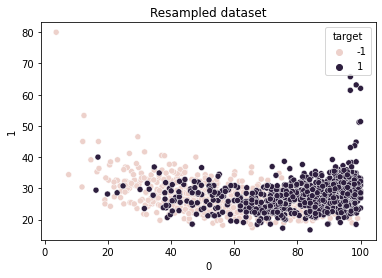

In [31]:
sns.scatterplot(data=data_resampled,
               x='0',
               y='1',
               hue='target').set(title='Resampled dataset')

The distributions are similar to that of the original data. The reason you see more purple dots, is because now they are not covered by the pink ones.

In [ ]:
#Plotting the same data but selecting two fdifferent features

[Text(0.5, 1.0, 'Original dataset')]

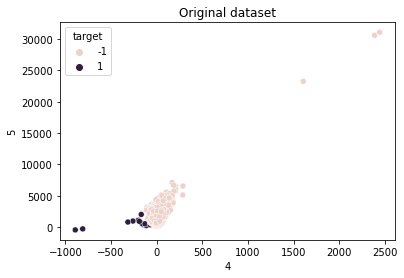

In [34]:
sns.scatterplot(data=data.sample(1784,random_state=0),
               x='4',
               y='5',
               hue='target').set(title='Original dataset')

In [ ]:
sns.scatterplot(data=data_resampled,
               )

## Machine learning performance comparison

Let's compare model performance with and without undersampling.

In [28]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [29]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9736769545142595
Test set
Random Forests roc-auc: 0.9724711107235364


In [30]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9937622893103626
Test set
Random Forests roc-auc: 0.9876831611048272


There is a big jump in model performance.

**HOMEWORK**

- Try random undersampling with and without replacement, and with different machine learning models.